In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [2]:
# Read in processed data
df = pd.read_csv('./datasets/credit.csv')

In [3]:
# Preview data
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Have had Credit Problems,Current Credit Balance,Maximum Open Credit,Have had Bankruptcy before,Have had Tax Liens,Delinquent Time,Credit Score Range
0,0.081528,0.594985,1.0,0.004342,1.0,0.746988,0.006592,0.8,0.0,0.416667,0.011965,0.202096,0.066667,1.0,0.006940,0.000271,1.0,0.0,0.000000,"(701.2, 717.8]"
1,0.309318,0.371466,1.0,1.000000,1.0,0.939759,0.013024,0.8,0.5,0.250000,0.066998,0.167665,0.226667,1.0,0.009063,0.000487,0.0,0.0,0.666667,"(734.4, 751.0]"
2,0.467122,0.903985,1.0,0.003365,0.0,0.819277,0.004413,0.3,0.5,0.250000,0.020057,0.124251,0.106667,0.0,0.007796,0.000251,0.0,0.0,0.000000,"(717.8, 734.4]"
3,0.539748,0.312567,0.0,0.001954,1.0,0.867470,0.004957,1.0,0.0,0.250000,0.037554,0.203593,0.066667,0.0,0.006549,0.000177,0.0,0.0,0.000000,"(717.8, 734.4]"
4,0.153657,0.565583,1.0,0.002064,1.0,0.873494,0.006693,0.0,0.0,0.250000,0.024906,0.238024,0.160000,1.0,0.003716,0.000177,1.0,0.0,0.333333,"(717.8, 734.4]"
5,0.544144,0.686563,1.0,0.005376,1.0,0.560241,0.015002,0.2,1.0,0.250000,0.042814,0.282934,0.040000,0.0,0.013296,0.000360,0.0,0.0,0.666667,"(668.0, 684.6]"
6,0.042962,0.138742,1.0,0.002047,1.0,0.927711,0.008328,0.0,1.0,0.250000,0.090119,0.152695,0.253333,0.0,0.020364,0.000663,0.0,0.0,0.000000,"(734.4, 751.0]"
7,0.198139,0.053855,1.0,1.000000,1.0,0.861446,0.003855,0.3,1.0,0.250000,0.027191,0.184132,0.200000,0.0,0.006204,0.000188,0.0,0.0,1.000000,"(717.8, 734.4]"
8,0.251344,0.067429,1.0,1.000000,1.0,0.933735,0.004227,0.0,0.5,0.250000,0.026565,0.071856,0.066667,0.0,0.004078,0.000143,0.0,0.0,0.333333,"(734.4, 751.0]"
9,0.006981,0.562819,1.0,1.000000,1.0,0.951807,0.008970,0.4,1.0,0.250000,0.040291,0.143713,0.120000,1.0,0.006860,0.000322,1.0,0.0,0.000000,"(734.4, 751.0]"


#### Oversample imbalanced dataset for classification

Since we care about precision as much as we care about recall, we want precision and recall as balanced as possible and oversampling can be used to increase the minority data points.


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[["Credit Score Range"]] = df[["Credit Score Range"]].apply(le.fit_transform)

In [6]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
labels = df["Credit Score Range"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 58987 observation with 18 features
test data has 19663 observation with 18 features


In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [10]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 21423), (1, 21423), (2, 21423), (3, 21423), (4, 21423), (5, 21423), (6, 21423), (7, 21423), (8, 21423), (9, 21423)]


### Linear Model

In [18]:

X = df.drop(columns = ['Loan ID', 'Customer ID', 'Credit Score Range', 
                       'Credit Score'])

y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
y_pred_train = LR_model.predict(X_train)
## model evaluation
print("MSE for testing set: ", mean_squared_error(y_test, y_pred), "\n")
print("MSE for training set: ", mean_squared_error(y_train, y_pred_train), "\n")
## The best R2 score is 1, it can be negative because the model is arbitrarily worse
print("R2 score for testing set: ", r2_score(y_test, y_pred), "\n")
print("R2 score for training set: ", r2_score(y_train, y_pred_train), "\n")

MSE for testing set:  0.020731413694460413 

MSE for training set:  0.020935968132080082 

R2 score for testing set:  0.2775364684968068 

R2 score for training set:  0.2721337738409869 



### Support Vector Regression

In [6]:
X = df.drop(columns = ['Loan ID', 'Customer ID', 'Credit Score', 'Credit Score Range'])
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = svm.SVR(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

print('MSE for training set: ', mean_squared_error(y_train, y_pred_train))
print('MSE for testing set: ', mean_squared_error(y_test, y_pred),'\n')

print('R2 score for training set: ', r2_score(y_train, y_pred_train))
print('R2 score for testing set: ', r2_score(y_test, y_pred))

MSE for training set:  0.02072959867346114
MSE for testing set:  0.02084024219386768 

R2 score for training set:  0.2762557478125591
R2 score for testing set:  0.2756088357369719


### Logistic Regression - Oversampled

In [7]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_resampled, y_resampled)

y_pred_train = clf.predict(X_resampled)
y_pred = clf.predict(X_test)

print('Classification report for training set:\n', classification_report(y_resampled, y_pred_train), '\n')
print('Classification report for testing set:\n', classification_report(y_test, y_pred))

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for training set:
                   precision    recall  f1-score   support

(584.834, 601.6]       0.00      0.00      0.00       180
  (601.6, 618.2]       0.00      0.00      0.00       321
  (618.2, 634.8]       0.00      0.00      0.00       495
  (634.8, 651.4]       0.00      0.00      0.00      1033
  (651.4, 668.0]       0.10      0.00      0.00      2041
  (668.0, 684.6]       0.15      0.00      0.00      3346
  (684.6, 701.2]       0.16      0.03      0.05      6156
  (701.2, 717.8]       0.26      0.05      0.09     11068
  (717.8, 734.4]       0.27      0.35      0.30     15171
  (734.4, 751.0]       0.45      0.84      0.59     18891

        accuracy                           0.38     58702
       macro avg       0.14      0.13      0.10     58702
    weighted avg       0.29      0.38      0.29     58702
 

Classification report for testing set:
                   precision    recall  f1-score   support

(584.834, 601.6]       0.00      0.00      

### Random Forest

Assumption:Leverage bagging method to solve overfitting problems in complete decision trees

Definition: Decision Trees that sample with replacement and randomly sample for features

Objective of RandomForest: To introduce randomness and decrease variance into the model framework, thus prevent outliers impacting the model training process. 

Hyperparameter: number of decision trees, tree depth, number of tree nodes, number of splits of decision tree

How Random Forest works in our dataset: 
For example, In our training data, we have 83150 observations with 18 features, random forest sample with replacement for 58987 rows of data from the original dataset so that each decision tree in the random forest has slightly different training data with the same distribution. Each decision tree has been selected with k features( k<18), for each sample of training data, a random forest will use k features to build the best decision tree. After repeating the tree building process, we get a group of different decision trees, thus we can combine them as a random forest model and perform regression for new data. 



#### Random Forest regressor

In [11]:
# plot the hyper-parameter tuning
def class_plot(grid, grid_param, title):
    scores = [x for x in grid.cv_results_['mean_test_score']]
    m_depth = grid_param['max_depth']
    n_est = grid_param['n_estimators']
    #given a new shape of max_depth array into length of n estimators array without changing the data
    scores = np.array(scores).reshape(len(m_depth), len(n_est))
    fig = plt.figure()
    ax = plt.subplot(111)
    for ind, i in enumerate(m_depth):
        plt.plot(n_est, scores[ind], '-o', label='Max depth' + str(i),)
    ax.legend(loc='lower right') #, bbox_to_anchor=(1, 0.5))
    plt.xlabel('n estimator')
    plt.ylabel('Mean score')
    plt.title(title)
    plt.show()
    


In [12]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
y = df["Credit Score"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 58987 observation with 18 features
test data has 19663 observation with 18 features


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
grid_1 = {'n_estimators': [2, 5,10,15],
          'max_depth': [30,40,45, 50]}

rf = RandomForestRegressor(random_state=1, verbose=1,n_jobs =6)
#The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
grid_rf = GridSearchCV(rf, grid_1, cv=3)
grid_rf.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    3.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    1.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Don

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_jobs=6, random_state=1,
                                             verbose=1),
             param_grid={'max_depth': [30, 40, 45, 50],
                         'n_estimators': [2, 5, 10, 15]})

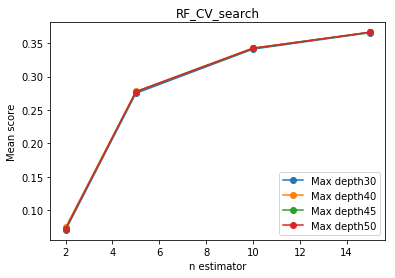

In [15]:
import matplotlib.pyplot as plt
class_plot(grid_rf, grid_1, 'RF_CV_search')

In [16]:
print (grid_rf.best_params_)
print (grid_rf.best_score_)

{'max_depth': 45, 'n_estimators': 15}
0.366235904023255


In [18]:
# re-train the model with full training set
rf_best = grid_rf.best_estimator_
rf_best.fit(X_train, y_train)
pred_rf_test = rf_best.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    4.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished


In [19]:
rf_best.score(X_test, y_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished


0.38922568930438894

In [21]:
#show feature importance
importances = rf_best.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Term : 0.226
Maximum Open Credit : 0.1161
Current Credit Balance : 0.0914
Annual Income : 0.0741
Years of Credit History : 0.0709
Current Loan Amount : 0.0701
Monthly Debt : 0.0691
Loan ID : 0.0603
Customer ID : 0.0601
Number of Open Accounts : 0.0487
Purpose : 0.0329
Years in current job : 0.0274
Delinquent Time : 0.0203
Home Ownership : 0.0116
Loan Status : 0.0089
Have had Credit Problems : 0.0063
Have had Bankruptcy before : 0.0044
Have had Tax Liens : 0.0017


#### Random Forest Classifier(without oversample)

In [24]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
labels = df["Credit Score Range"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 58987 observation with 18 features
test data has 19663 observation with 18 features


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
classifier_RF = RandomForestClassifier()
cv_score = model_selection.cross_val_score(classifier_RF, X_train, y_train, cv=5)
print(cv_score)
print('Model accuracy of Random Forest Classfier' + ' is ' + str(cv_score.mean()))

[0.47101204 0.47516528 0.4714758  0.47715521 0.47495126]
Model accuracy of Random Forest Classfier is 0.4739519169734986


In [27]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [28]:
#find optimal hyperparameters of Random forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [29]:
print_grid_search_metrics(Grid_RF)

Best score: 0.4704426622695916
Best parameters set:
n_estimators:80


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
best_RF_model = Grid_RF.best_estimator_

In [31]:
ytrain_pred_rf = best_RF_model.predict(X_train)
ytest_pred_rf = best_RF_model.predict(X_test)

In [32]:
print(accuracy_score(y_test, ytest_pred_rf))

0.48069979148654834


In [33]:
print('Classification report for training set:\n', classification_report(y_train, ytrain_pred_rf), '\n')
print('Classification report for testing set:\n', classification_report(y_test, ytest_pred_rf), '\n')

Classification report for training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       311
           2       1.00      1.00      1.00       511
           3       1.00      1.00      1.00      1011
           4       1.00      1.00      1.00      1967
           5       1.00      1.00      1.00      3088
           6       1.00      1.00      1.00      5600
           7       1.00      1.00      1.00      9751
           8       1.00      1.00      1.00     15154
           9       1.00      1.00      1.00     21423

    accuracy                           1.00     58987
   macro avg       1.00      1.00      1.00     58987
weighted avg       1.00      1.00      1.00     58987
 

Classification report for testing set:
               precision    recall  f1-score   support

           0       0.88      0.13      0.23        52
           1       0.93      0.11      0.20      

In [34]:
#show feature importance
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Maximum Open Credit : 0.1068
Current Credit Balance : 0.0986
Annual Income : 0.0931
Monthly Debt : 0.092
Years of Credit History : 0.0907
Loan ID : 0.0887
Customer ID : 0.0886
Current Loan Amount : 0.0858
Number of Open Accounts : 0.0673
Years in current job : 0.0497
Term : 0.0448
Delinquent Time : 0.0247
Purpose : 0.0246
Home Ownership : 0.0197
Loan Status : 0.0103
Have had Credit Problems : 0.007
Have had Bankruptcy before : 0.0053
Have had Tax Liens : 0.0024


5-fold cross validation was applied to Random Forest with dependent variables being the labeled encoded target score range. The accuracy of Random Forest classifier for training data has improved to 0.47. Then grid search cross validation is used to select the best hyperparameters among the number of decision trees as 40, 60, and 80. The number of decision trees was 80 and the accuracy after grid search remained to be 0.47. The accuracy of the test data turned out to be 0.48.
The precision and recall for the training set showed an overfitting trend, it might be due to the imbalance in dataset characteristics.The precision was much higher than the recall for prediction of lower credit score ranges (0 ~7), but the weighted average recall was 0.48 and the weighted average precision was 0.47.


#### Random Forest Classifier( with oversample)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
classifier_RF = RandomForestClassifier()
cv_score = model_selection.cross_val_score(classifier_RF, X_resampled, y_resampled, cv=5)
print(cv_score)
print('Model accuracy of Random Forest Classfier' + ' is ' + str(cv_score.mean()))

[0.91016664 0.90829949 0.92230313 0.94767306 0.96968212]
Model accuracy of Random Forest Classfier is 0.9316248891378425


In [36]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [37]:
#find optimal hyperparameters of Random forest through grid search
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [38]:
print_grid_search_metrics(Grid_RF)

Best score: 0.9300611492321338
Best parameters set:
n_estimators:80


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
best_RF_model = Grid_RF.best_estimator_

In [40]:
ytrain_pred_rf = best_RF_model.predict(X_resampled)
ytest_pred_rf = best_RF_model.predict(X_test)

In [41]:
print(accuracy_score(y_test, ytest_pred_rf))

0.4861923409449219


In [42]:
print('Classification report for training set:\n', classification_report(y_resampled, ytrain_pred_rf), '\n')
print('Classification report for testing set:\n', classification_report(y_test, ytest_pred_rf), '\n')

Classification report for training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21423
           1       1.00      1.00      1.00     21423
           2       1.00      1.00      1.00     21423
           3       1.00      1.00      1.00     21423
           4       1.00      1.00      1.00     21423
           5       1.00      1.00      1.00     21423
           6       1.00      1.00      1.00     21423
           7       1.00      1.00      1.00     21423
           8       1.00      1.00      1.00     21423
           9       1.00      1.00      1.00     21423

    accuracy                           1.00    214230
   macro avg       1.00      1.00      1.00    214230
weighted avg       1.00      1.00      1.00    214230
 

Classification report for testing set:
               precision    recall  f1-score   support

           0       0.69      0.17      0.28        52
           1       0.72      0.16      0.26      

In [43]:
#show feature importance
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Maximum Open Credit : 0.0971
Annual Income : 0.0944
Monthly Debt : 0.0933
Current Credit Balance : 0.0926
Years of Credit History : 0.0918
Loan ID : 0.0914
Customer ID : 0.0913
Current Loan Amount : 0.0853
Number of Open Accounts : 0.0719
Years in current job : 0.0486
Term : 0.0367
Delinquent Time : 0.0288
Purpose : 0.0261
Home Ownership : 0.0209
Loan Status : 0.0109
Have had Credit Problems : 0.0085
Have had Bankruptcy before : 0.0072
Have had Tax Liens : 0.003


5 fold cross validation was applied to select the best hyperparameter for the Random Forest model trained with a resampled dataset. The accuracy after oversampling turned out to be 0.93. Grid search with 5 fold cross validation was also applied to random forest classifiers, the accuracy after grid search turned out to be 0.93  . The best hyperparameter for the number of decision trees was 80. The accuracy for the test data was 0.50. Even though the precision and recall still showed an overfitting trend for training data, the test data has improved weighted average recall to be 0.49, and the overall recall scores for all credit score ranges showed more balanced precision. 
The most contributing factors for Random Forest classifier after oversampling was maximum open credit, annual income and monthly debt. 

